In [48]:
import numpy as np
import matplotlib.pyplot as plt

Function to fit

Source https://alexshtf.github.io/2024/01/21/Bernstein.html

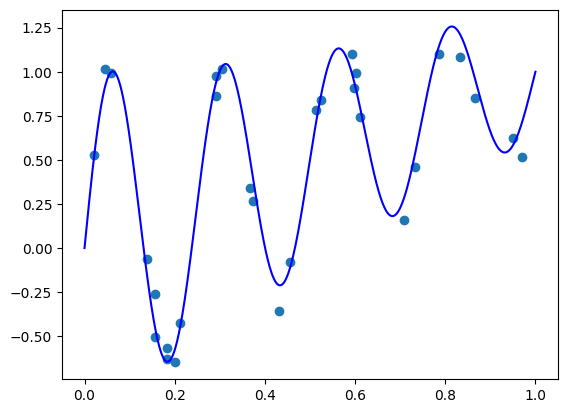

In [55]:
def true_func(x):
  return np.sin(8 * np.pi * x) / np.exp(x) + x

m = 30
sigma = 0.1

# generate features
np.random.seed(42)
X = np.random.rand(m)
y = true_func(X) + sigma * np.random.randn(m)

plt_xs = np.linspace(0, 1, 1000)
plt.scatter(X.ravel(), y.ravel())
plt.plot(plt_xs, true_func(plt_xs), 'blue')
plt.show()

See [lin_reg.ipynb](Linear/lin_reg.ipynb) for regression matrix explanation.

Basically we express data fit as
$$
\begin{bmatrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_n & x_n^2
\end{bmatrix}
\begin{bmatrix}
\beta_1 \\ \beta_2 \\ \beta_3
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{bmatrix}
$$
$$=V_m\vec{\beta}=\vec{y}$$

Matrix $V_m$ is called "Vandermonde matrix"

* Rows will contain powers of same sample point. 
* Columns separate sample points

Create this matrix

In [50]:
n = 50  # poly degree
Vm = np.array([[a**i for i in range(n+1)] for a in X])
Vm_np = np.polynomial.polynomial.polyvander(X, deg=n) # exicting solution
print(np.allclose(Vm,Vm_np), Vm.shape)

True (30, 51)


Plot basis function. Can extract as columns of $Vm$

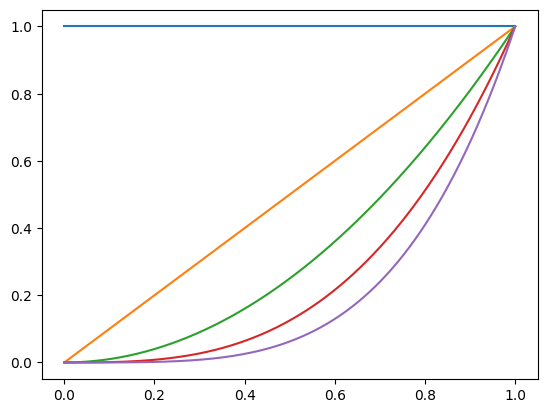

In [51]:
Vm_poly = np.polynomial.polynomial.polyvander(plt_xs, deg=4)
for i,v in enumerate(Vm_poly.T):
    plt.plot(plt_xs, v)


Find best fit using linear regression.

Solution is vector of coefficients $\vec{\beta}$

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)# constants included
model.fit(Vm, y)
print(model.coef_.shape) # coefficients

(51,)


to evaluate model on different sample points, we create new $Vm$ and 'dot' it with $\vec{\beta}$

$$=V_m^{\text{new}}\vec{\beta}=\vec{y}^{\text{new}}$$

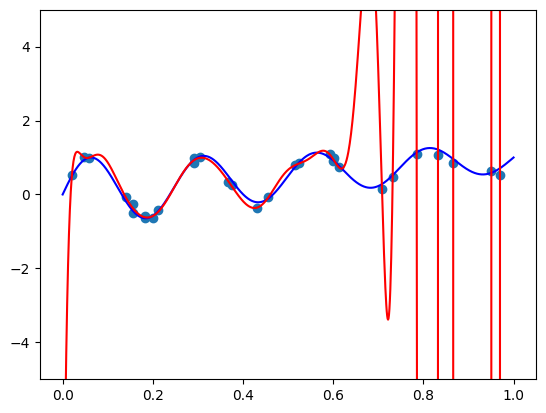

In [53]:
plt.scatter(X.ravel(), y.ravel())                                    # plot the samples
plt.plot(plt_xs, true_func(plt_xs), 'blue')                          # plot the true function
Vm_new = np.array([[a**i for i in range(n+1)] for a in plt_xs])
plt.plot(plt_xs, model.predict(Vm_new), 'r') # plot the fit model
plt.ylim([-5, 5])
plt.show()

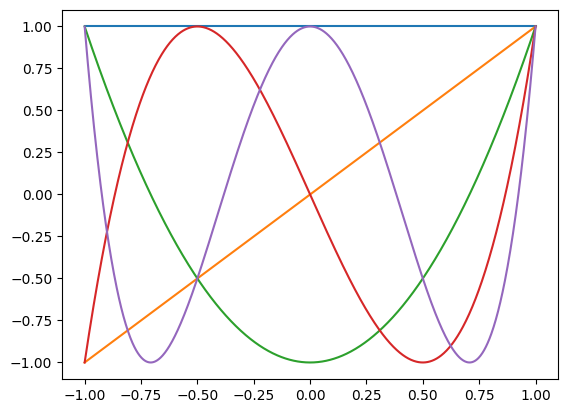

In [60]:
#from sympy import binomial, Symbol
# x = Symbol('x', real=True)
plt_xs_rescaled = 2*plt_xs-1    # [0,1] to [-1,1]
Vm_cheb = np.polynomial.chebyshev.chebvander(plt_xs_rescaled, deg=4)
for i,v in enumerate(Vm_cheb.T):
    plt.plot(plt_xs_rescaled, v)
